# CHAPTER 1

a ) 
Main steps and activities in real world problems:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

b )
KNN is a non -parametric model, LR is a parametric model.
KNN is slow in real time as it have to keep track of all training data and find the neighbor nodes, whereas LR can easily extract output from the tuned θ coefficients.So LR is fast.

Accuracy, precision, and recall is better in KNN according to Linear Regression.

c ) Overfitting
If our model has begun to work on our dataset we use for training and memorize it too much, or if our training set is uniform, the risk of overfitting is high. We will probably get a very low score when we show our test data to this model where we got a high score on the training set. Because the model memorized the situations in the training set and searches for these situations in the test data set. Since memorized situations cannot be found in the slightest change, you can get very bad prediction scores in the test data set. Models with overfitting problems show high variance and low bias.


Underfitting
Unlike over-fitting, if a model has insufficient learning, it means that the model does not fit the training data and therefore misses trends in the data. It also means that the model cannot be generalized to new data. As you can imagine, this problem is usually the result of a very simple model.
Models with underfitting problems have a high error rate in both training and test data sets. It has low variance and high bias. Instead of following training data too closely, these models ignore lessons learned from training data and fail to learn the basic relationship between inputs and outputs.


Regularization
Reduces risk of overfitting

d ) It shows three models: the dotted line represents the original model that was trained with a few countries missing, the dashed line is our second model trained with all countries, and the solid line is a linear model trained with the same data as the first model but with a regularization constraint. You can see that regularization forced the model to have a smaller slope, which fits a bit less the training data that the model was trained on, but actually allows it to generalize better to new examples

# CHAPTER 2

### Dataset Explain

In [324]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from sklearn import preprocessing
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [325]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston_dataset = load_boston() #load dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X,y = boston_dataset["data"],boston_dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [326]:
boston.to_csv('boston.csv')
X_train.to_csv('boston_training.csv')
X_test.to_csv('boston_test.csv')

In [327]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(boston) 
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
  
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(boston) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]

After Standardisation : 
 [[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.

In [328]:
boston.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [329]:
X,y = boston_dataset["data"],boston_dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.count()


0     404
1     404
2     404
3     404
4     404
5     404
6     404
7     404
8     404
9     404
10    404
11    404
12    404
dtype: int64

In [330]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X_train) 
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
  
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(X_train) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[1.55603222e-03 0.00000000e+00 3.50073314e-01 ... 5.53191489e-01
  9.86304844e-01 3.59564165e-01]
 [8.78387158e-04 0.00000000e+00 1.31598240e-01 ... 4.25531915e-01
  9.90692366e-01 2.39406780e-01]
 [4.83309632e-04 3.30000000e-01 6.30498534e-02 ... 6.17021277e-01
  1.00000000e+00 1.75544794e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.18341404e-01]
 [1.01832216e-04 9.00000000e-01 1.20601173e-01 ... 3.51063830e-01
  9.73218362e-01 4.17675545e-02]
 [1.30066490e-03 0.00000000e+00 8.90762463e-02 ... 5.74468085e-01
  9.01293431e-01 1.48910412e-01]]

After Standardisation : 
 [[-0.42265668 -0.48378569 -0.16187534 ... -0.32677683  0.39127109
   0.14324484]
 [-0.42981497 -0.48378569 -1.03401944 ... -0.89479908  0.40954381
  -0.41350292]
 [-0.43398836  0.90941677 -1.30766197 ... -0.0427657   0.44830733
  -0.70940664]
 ...
 [-0.43263008 -0.48378569  0.11908383 ...  1.18794918  0.44830733
  -0.97445784]
 [-0.43801809  3.

In [331]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X_test) 
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
  
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(X_test) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[4.77820284e-03 0.00000000e+00 3.47285537e-01 ... 6.17021277e-01
  9.98335771e-01 1.95633439e-01]
 [7.65201746e-03 0.00000000e+00 8.44177373e-01 ... 9.14893617e-01
  1.00000000e+00 4.39528871e-01]
 [2.25124315e-03 0.00000000e+00 3.38582677e-01 ... 7.02127660e-01
  9.97150638e-01 3.43004884e-01]
 ...
 [4.51132338e-04 8.75000000e-01 2.98383755e-02 ... 2.34042553e-01
  9.36154118e-01 4.53892560e-02]
 [7.29293792e-03 2.50000000e-01 1.01533361e-01 ... 4.25531915e-02
  9.74683544e-01 7.90002873e-02]
 [6.63501818e-03 0.00000000e+00 3.47285537e-01 ... 6.17021277e-01
  9.98310555e-01 2.74921000e-01]]

After Standardisation : 
 [[-0.31461188 -0.50636155 -0.1901945  ...  0.03510202  0.40893423
  -0.41148084]
 [-0.29347023 -0.50636155  1.53971823 ...  1.2285706   0.41770283
   0.77736972]
 [-0.33320184 -0.50636155 -0.22049322 ...  0.37609304  0.40268993
   0.30687056]
 ...
 [-0.34644463  2.72025289 -1.29537644 ... -1.49935759  0.08130752
  -1.14383519]
 [-0.29611185  0.

#### CRIM: Per capita crime rate by town
#### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#### INDUS: Proportion of non-retail business acres per town
#### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX: Nitric oxide concentration (parts per 10 million)
#### RM: Average number of rooms per dwelling
#### AGE: Proportion of owner-occupied units built prior to 1940
#### DIS: Weighted distances to five Boston employment centers
#### RAD: Index of accessibility to radial highways
#### TAX: Full-value property tax rate per $10,000


#### PTRATIO: Pupil-teacher ratio by town
#### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
#### LSTAT: Percentage of lower status of the population


This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The dataset is small in size with only 506 cases.

In [332]:
X_test.count()

0     102
1     102
2     102
3     102
4     102
5     102
6     102
7     102
8     102
9     102
10    102
11    102
12    102
dtype: int64

Sum of train dataset and test dataset = boston dataset
404 + 102 = 506

In [333]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [334]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [335]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [336]:
boston.shape

(506, 13)

In [337]:
boston.isnull().values.any()

False

In [338]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [339]:
boston['MEDV'] = boston_dataset.target
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [340]:
boston = boston.dropna()
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:ylabel='Frequency'>

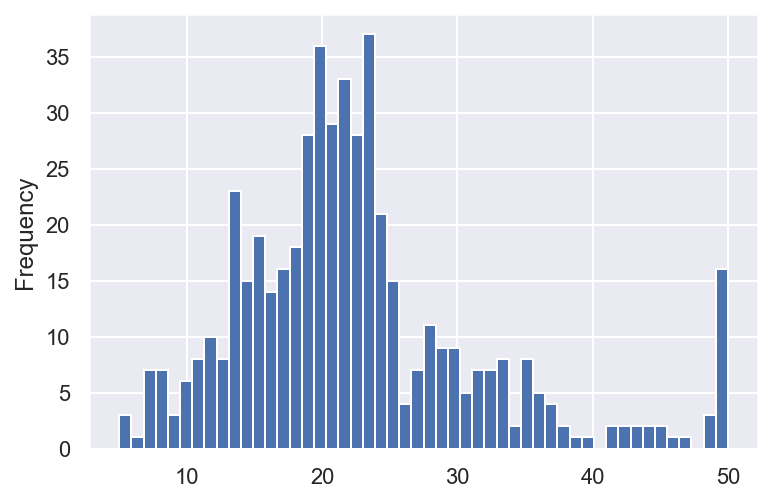

In [341]:
boston['MEDV'].plot.hist(bins = 50)

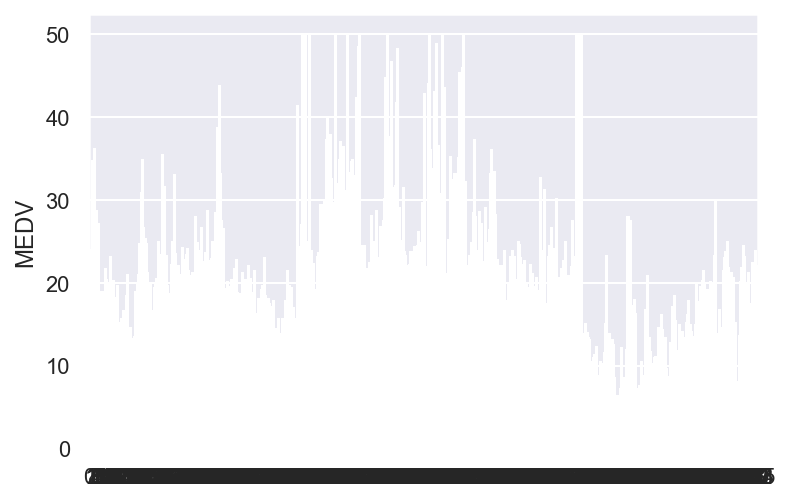

In [342]:
sns.barplot(x = boston.MEDV.index, y = 'MEDV' , data = boston);

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


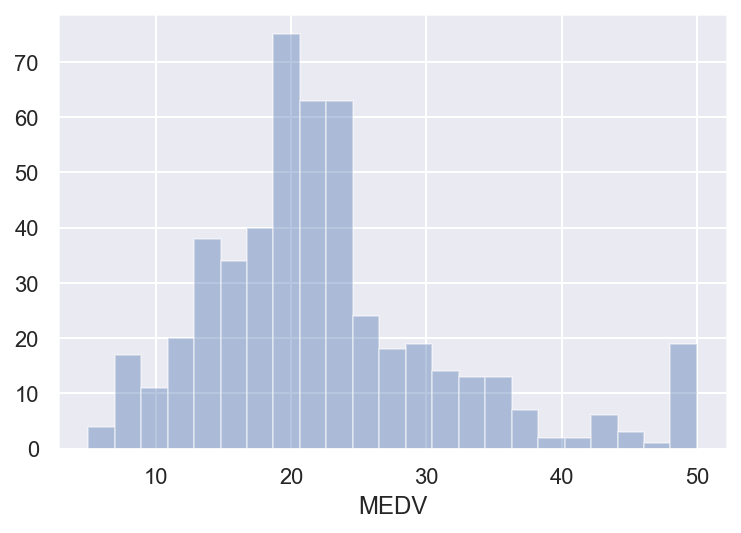

In [343]:
sns.distplot(boston.MEDV, kde = False);

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


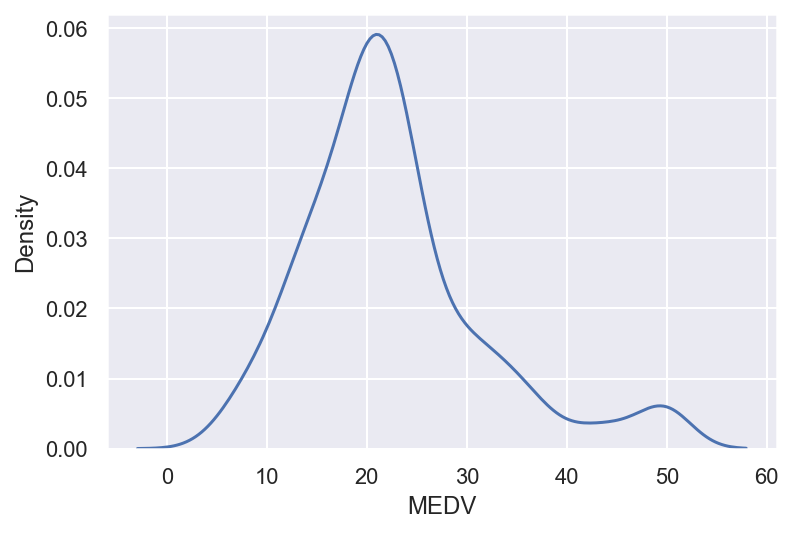

In [344]:
sns.distplot(boston.MEDV, hist = False);

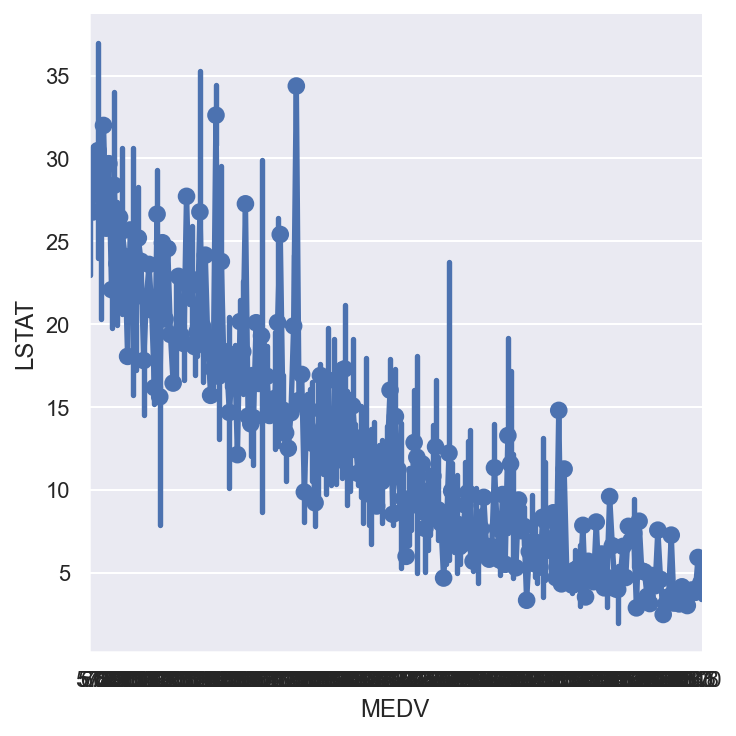

In [345]:
sns.catplot(x = 'MEDV', y = 'LSTAT', kind = 'point', data = boston);

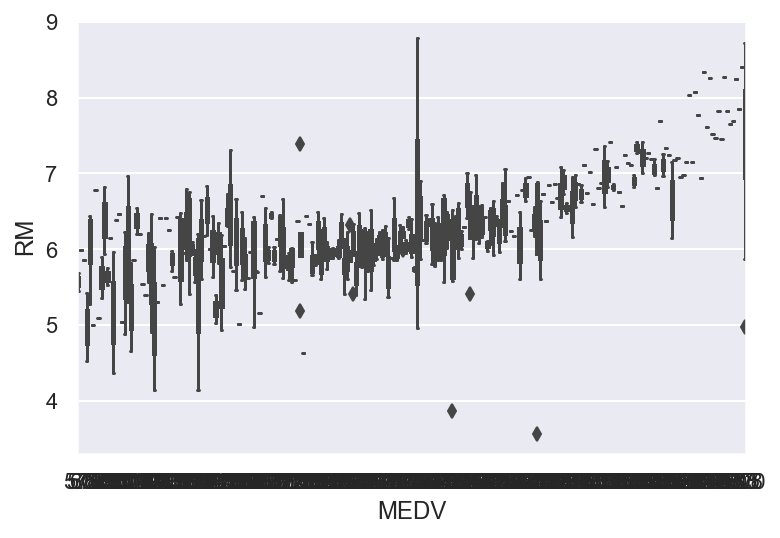

In [346]:
sns.boxplot(x = 'MEDV', y= 'RM', data = boston);

Saving figure attribute_histogram_plots


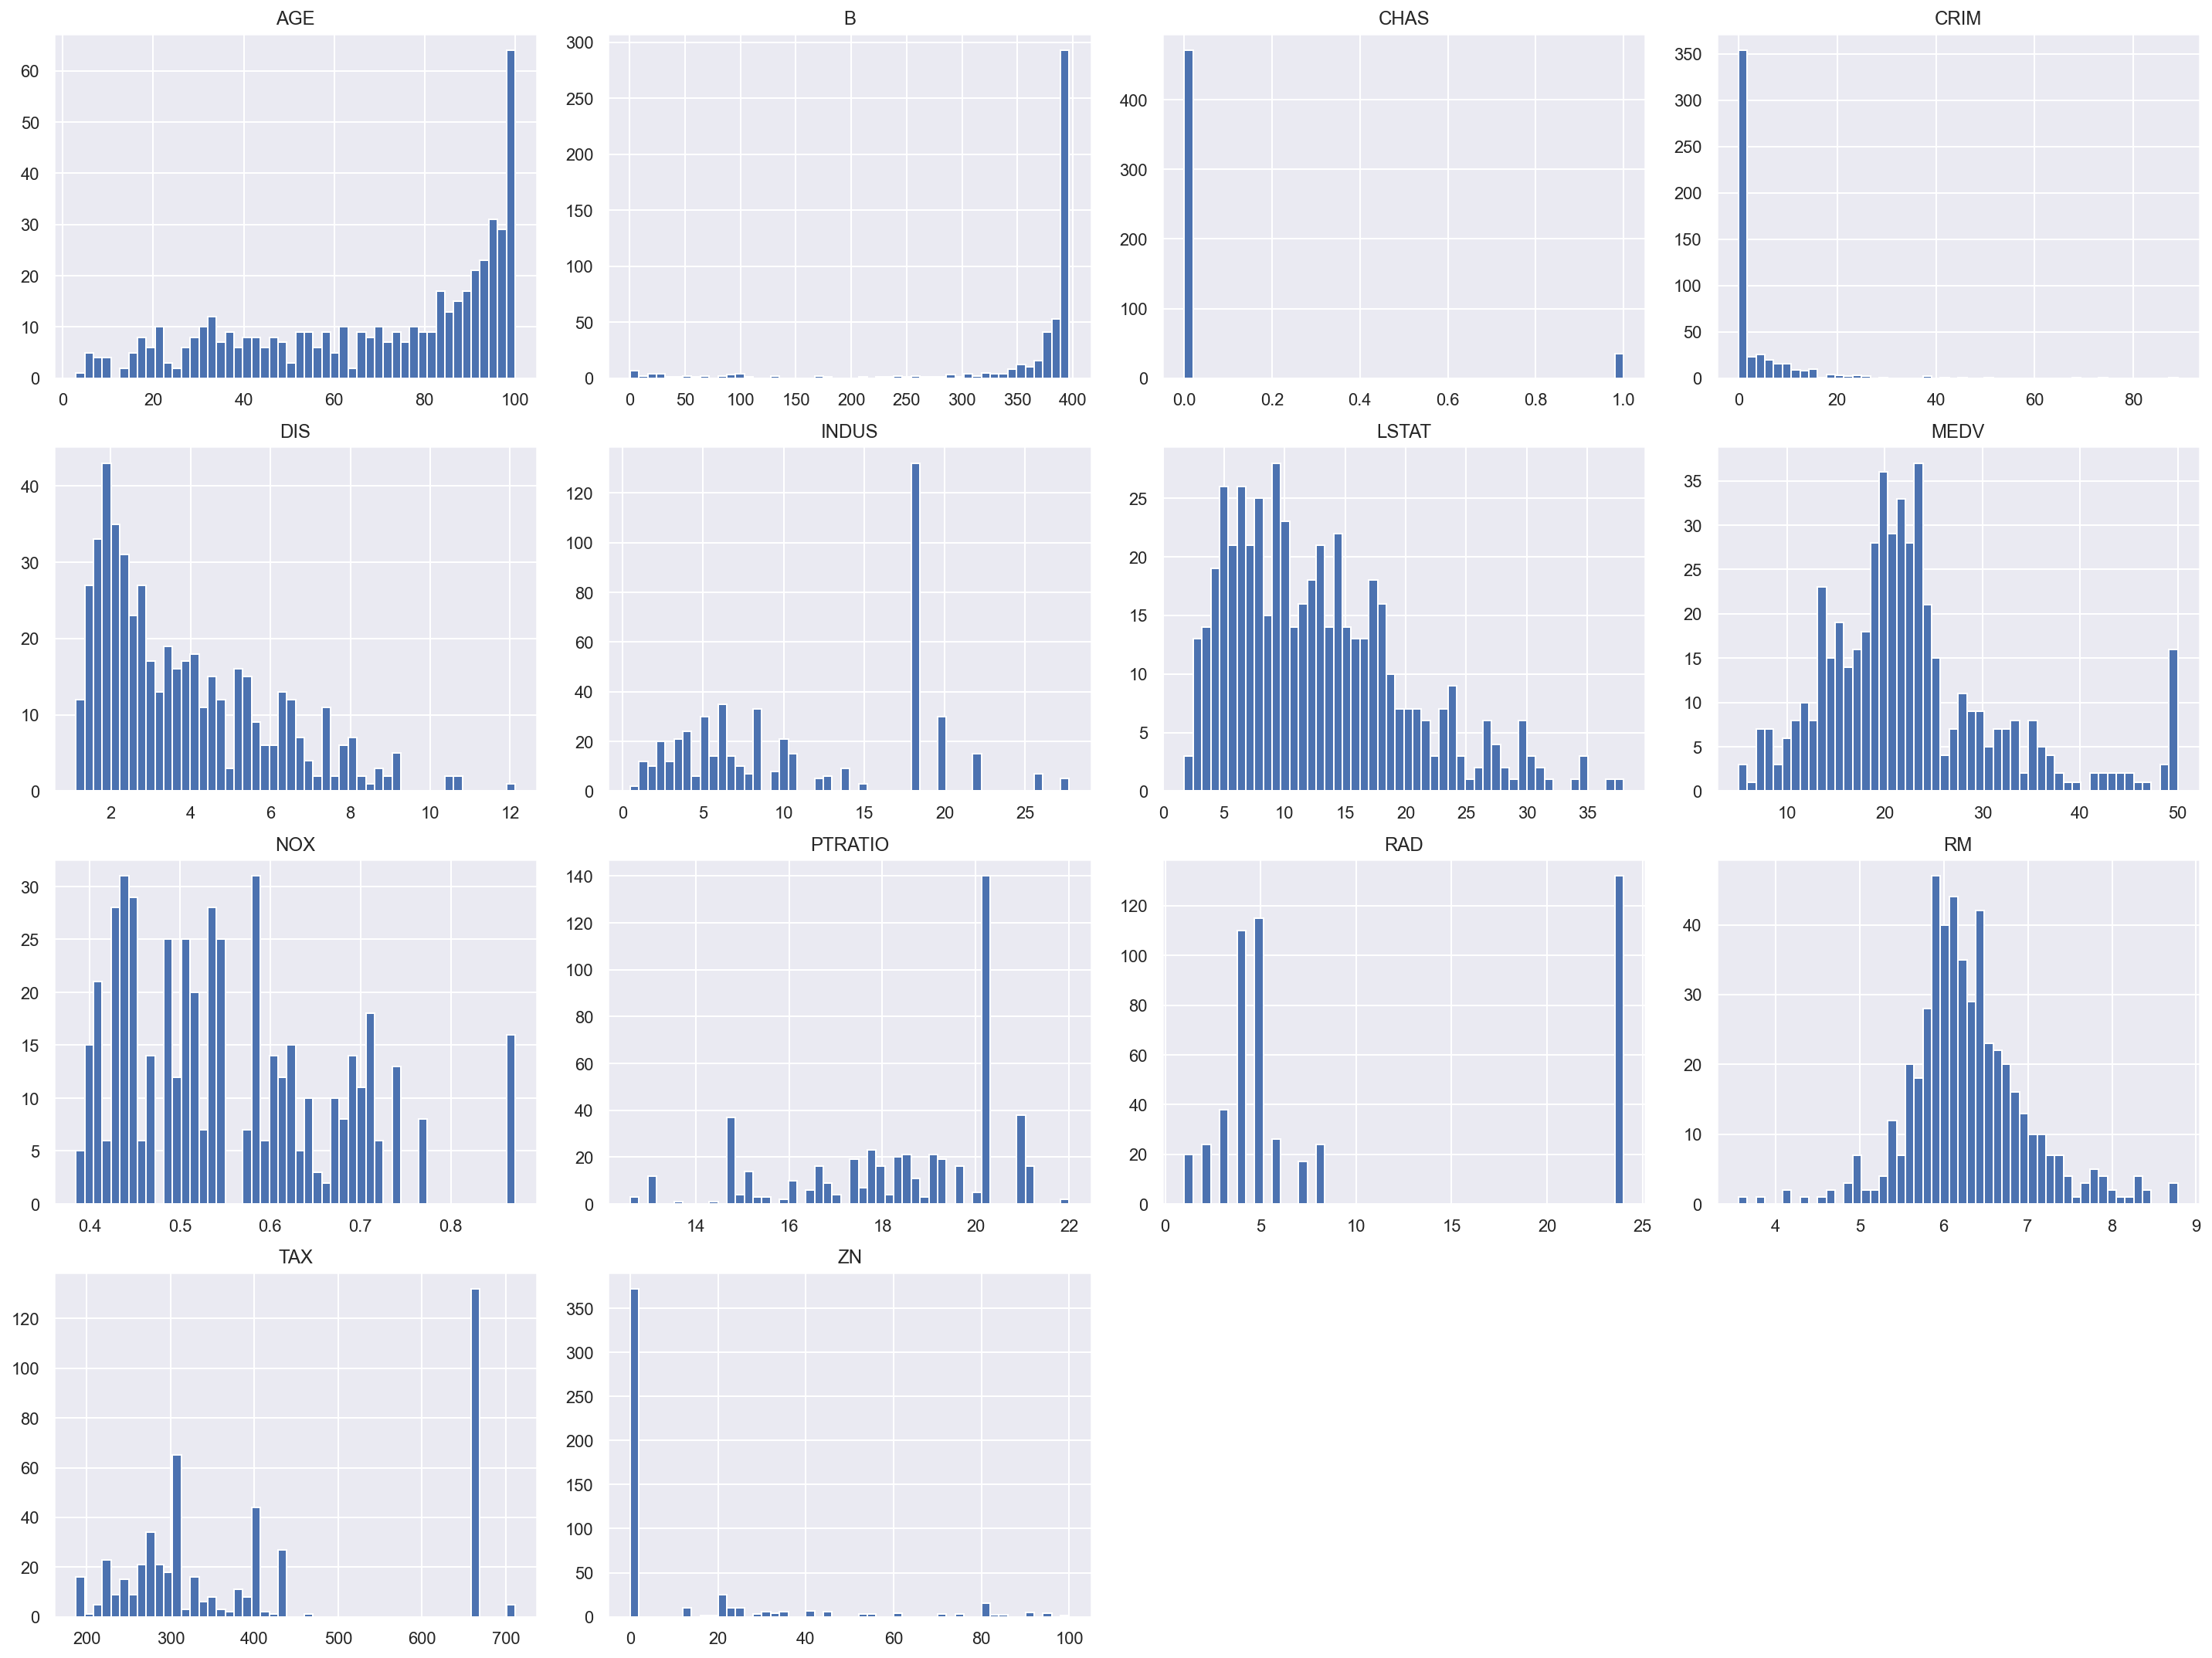

In [347]:
boston.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

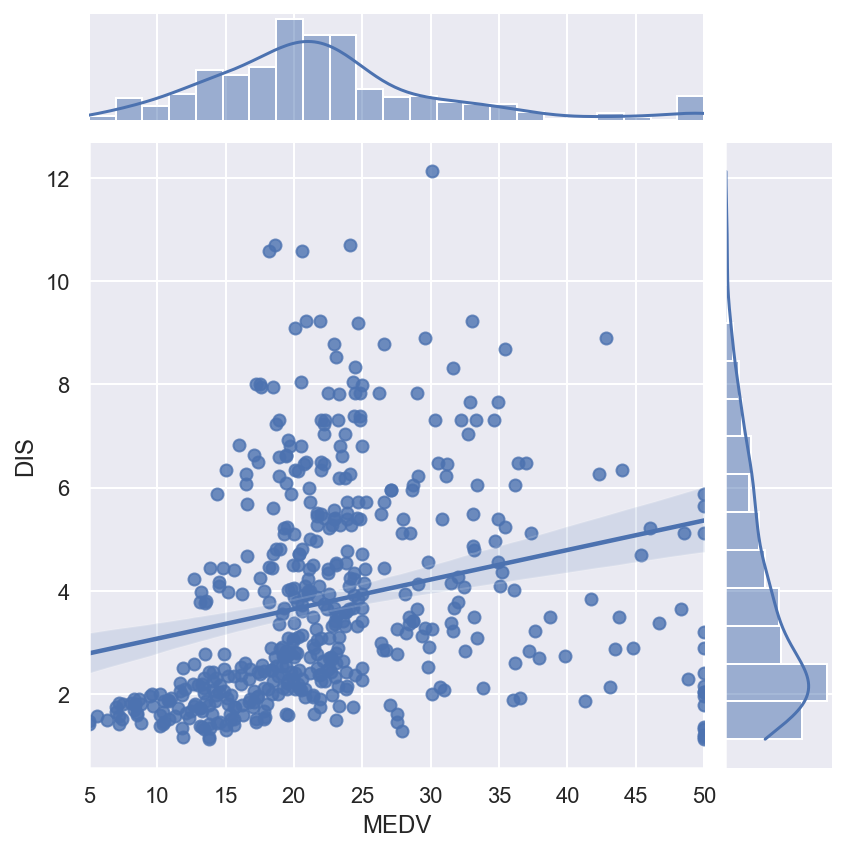

In [348]:
sns.jointplot(x = 'MEDV', y = 'DIS', data = boston, kind = "reg");

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


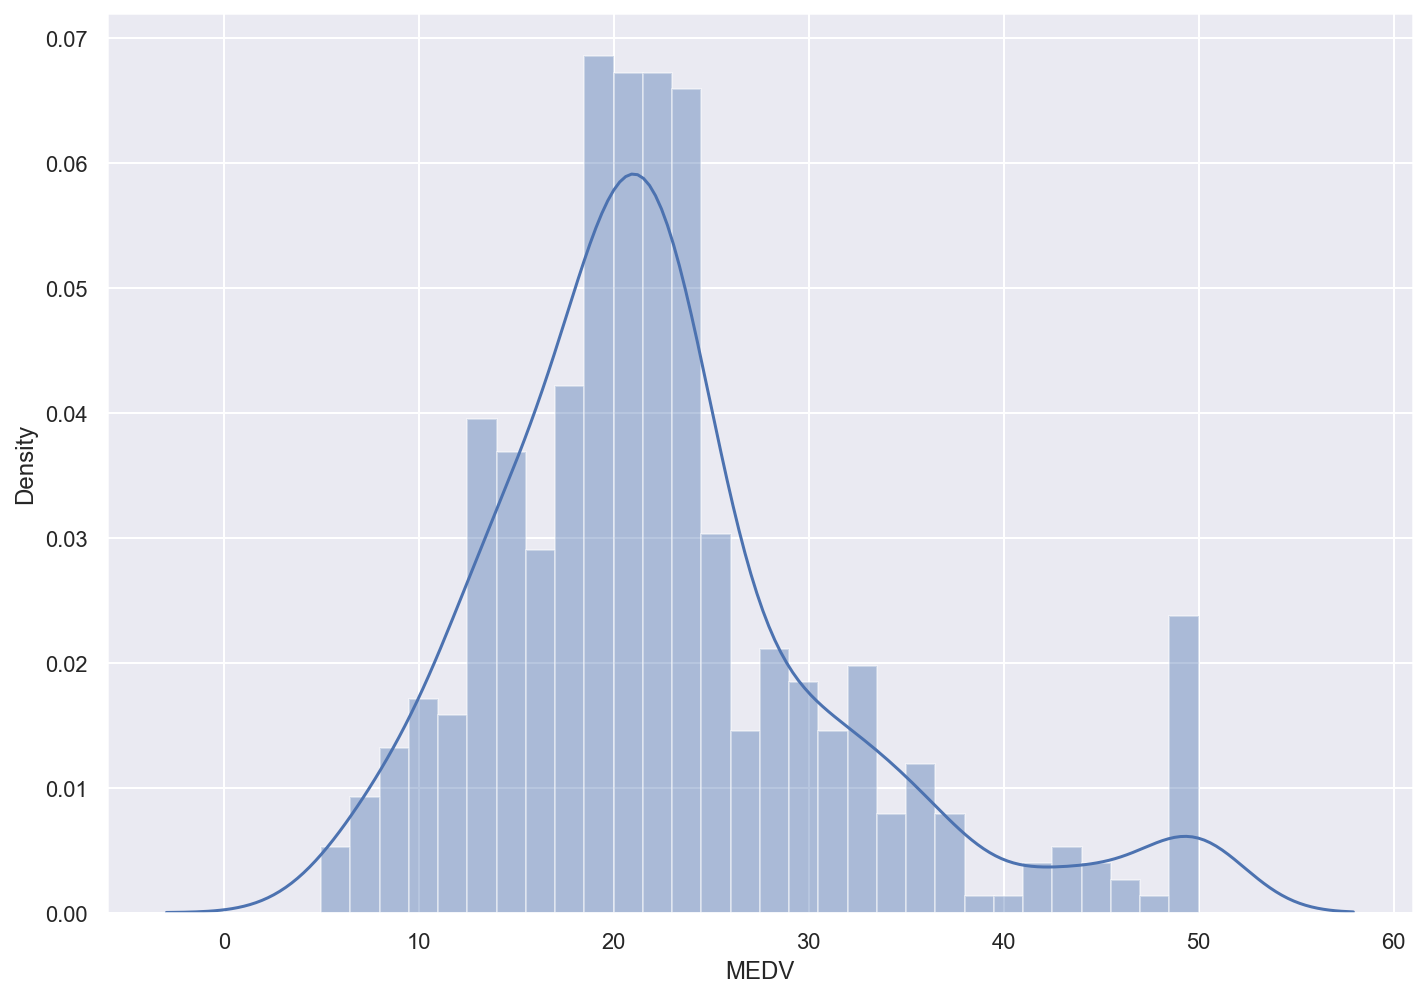

In [349]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

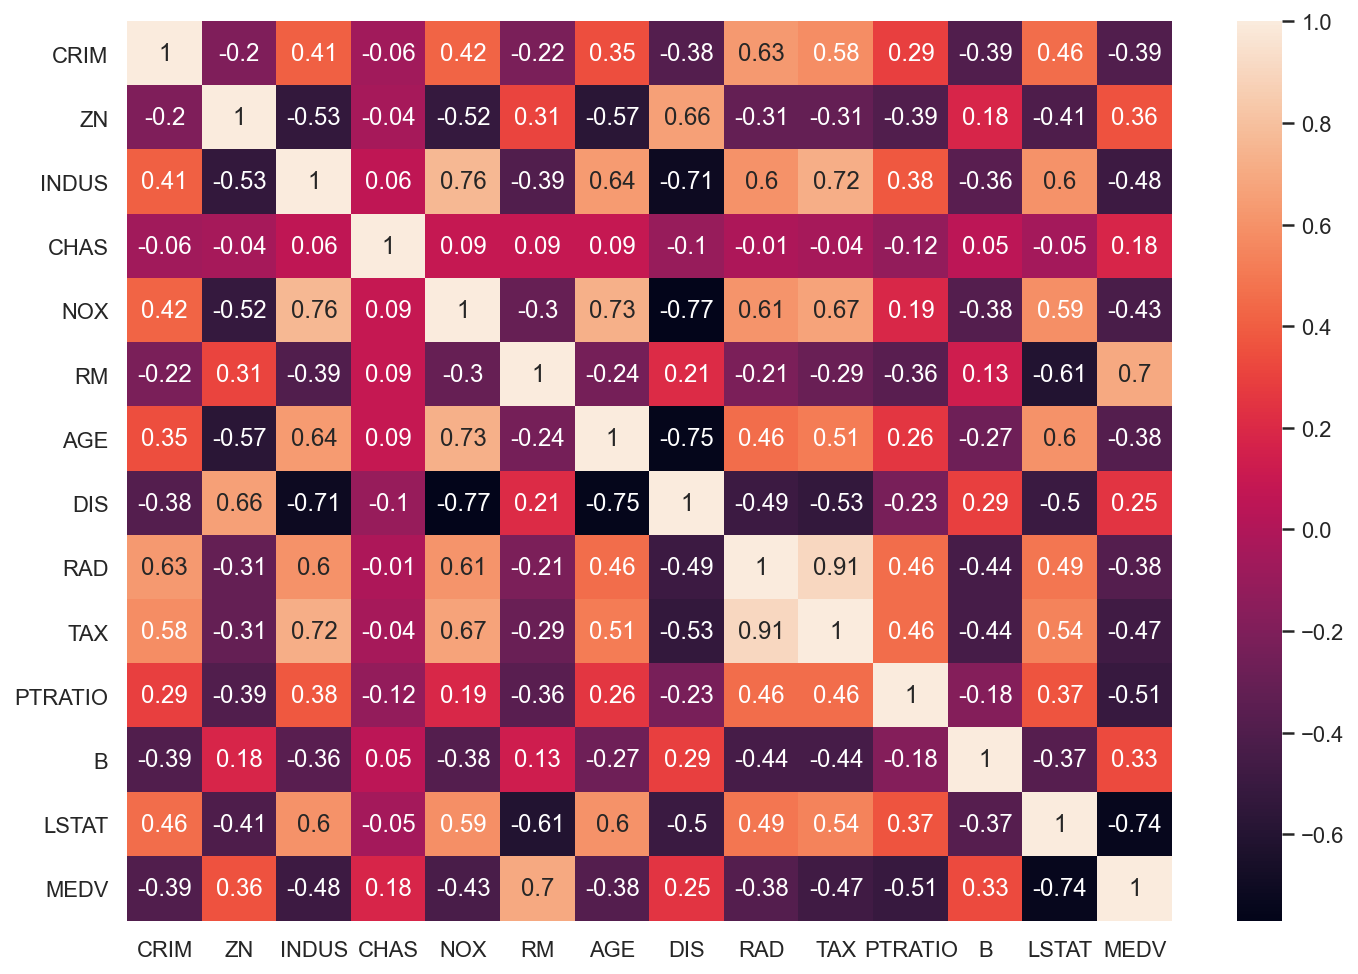

In [350]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [351]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


When we look at correlation analysis table,the strongest attributes are LSTAT and RM

### LSTAT and RM selected

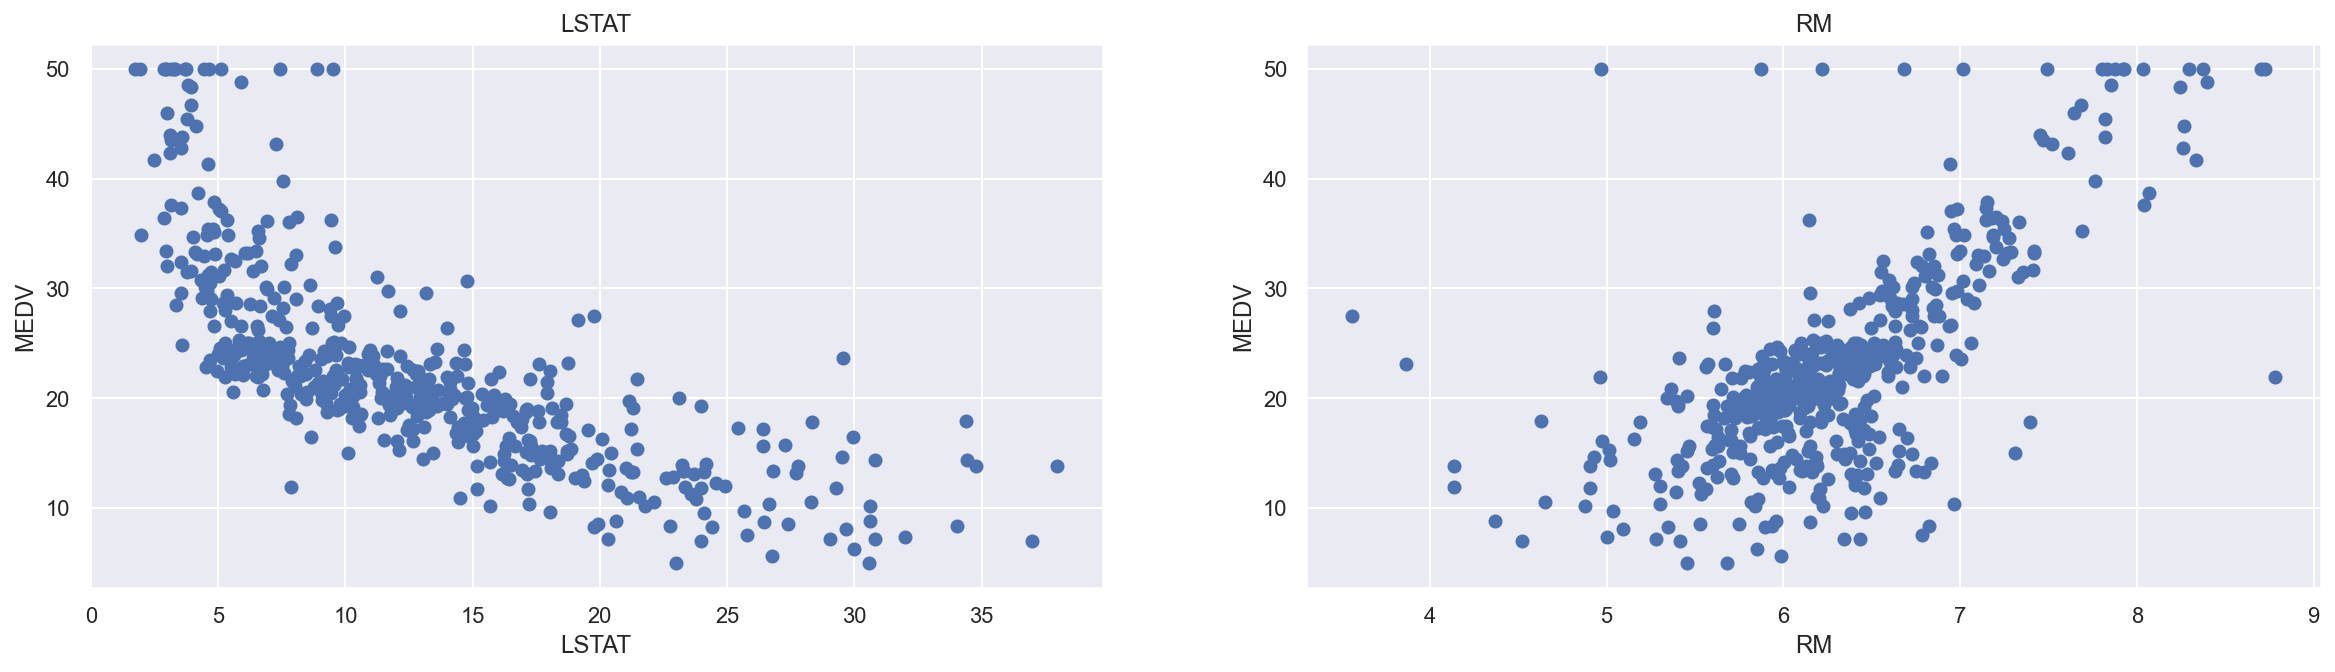

In [352]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

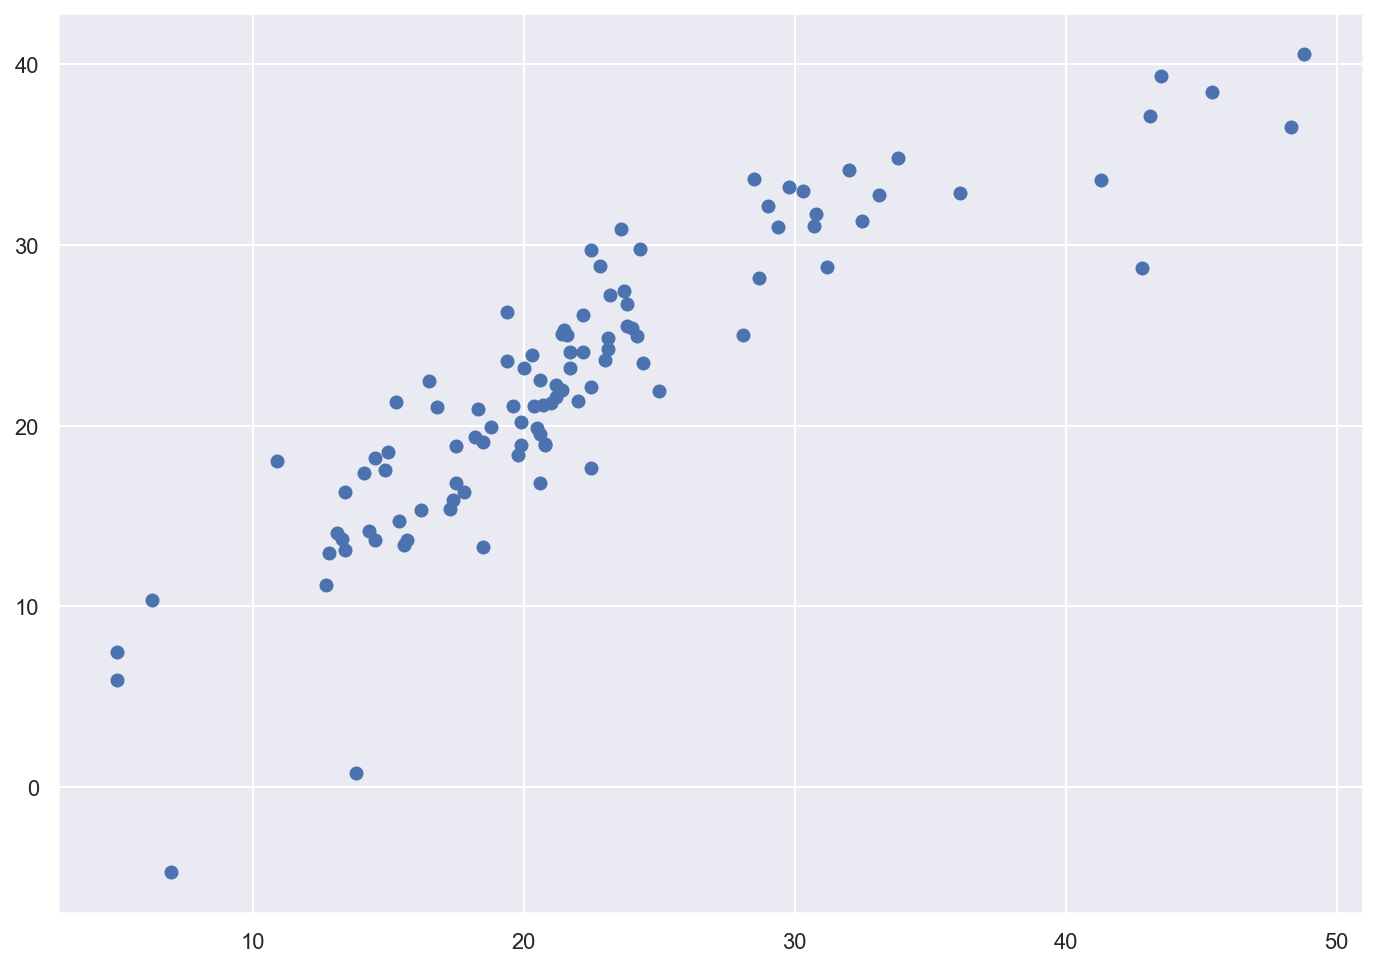

In [353]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predd =lr.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(Y_test,predd)
plt.show()

In [354]:
lr.coef_

array([-1.20536496e-01,  5.15508315e-02, -7.75330209e-03,  3.22680982e+00,
       -1.89618414e+01,  3.27609258e+00,  5.27865936e-03, -1.57960741e+00,
        2.77959559e-01, -9.36397718e-03, -9.91384963e-01,  8.82871276e-03,
       -5.75276283e-01])

coef_ gives you an array of weights estimated by linear regression

In [355]:
lr.intercept_

41.462271477809686

The intercept (often labeled as constant) is the point where the function crosses the y-axis. In some analysis, the regression model only becomes significant when we remove the intercept, and the regression line reduces to Y = bX + error.

In [356]:
# model evaluation for training set
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.841727379267629
R2 score is 0.7308803454829325


The model performance for testing set
--------------------------------------
RMSE is 4.0644973328606
R2 score is 0.7756473884037053


The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MEDV', ylabel='RM'>

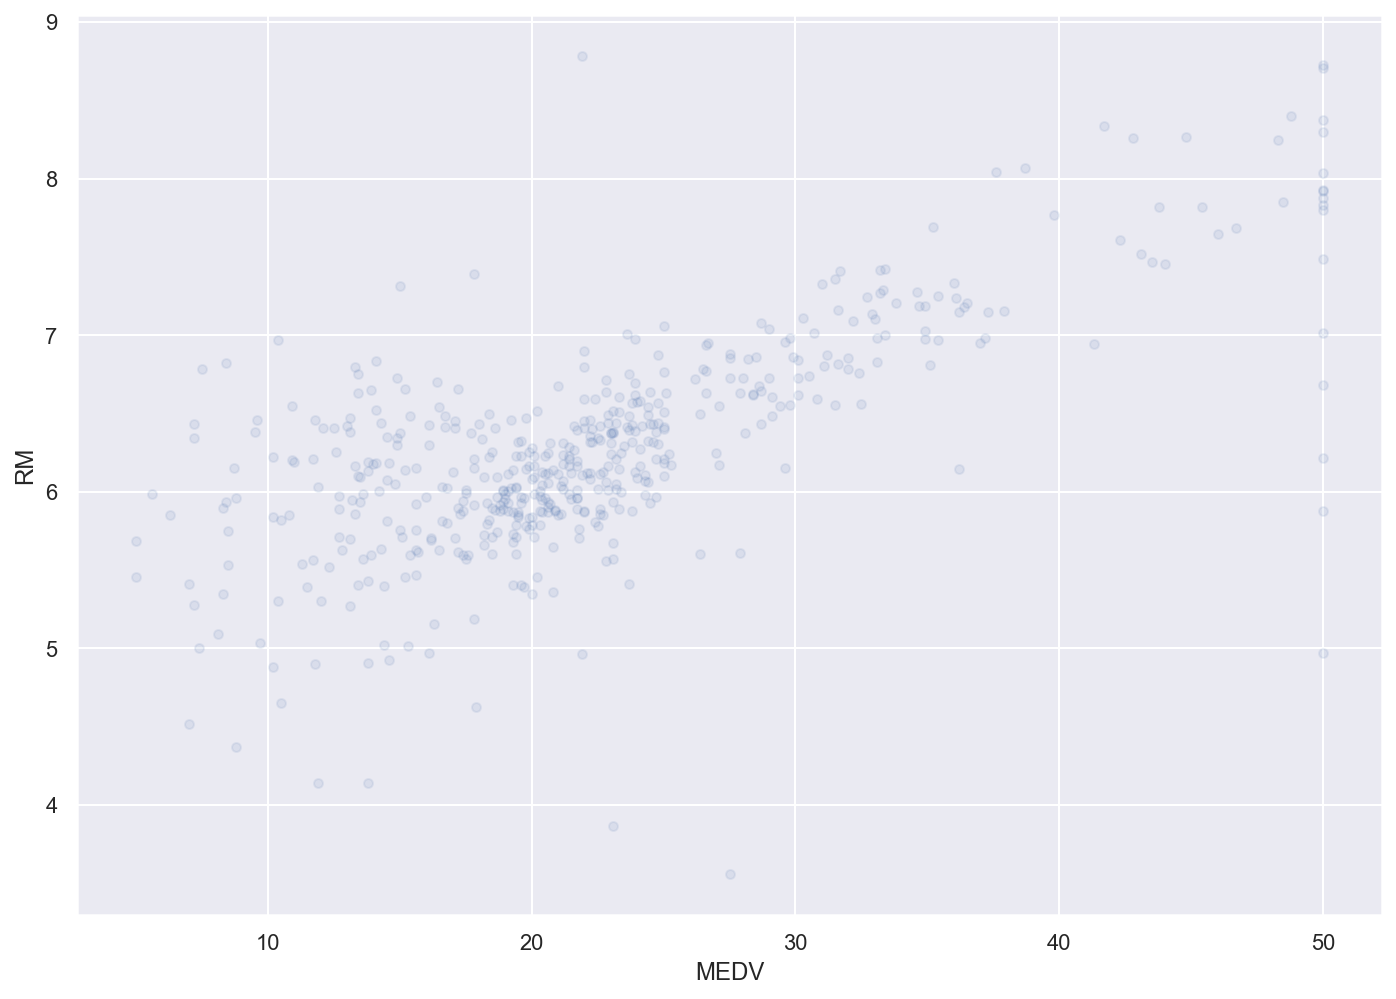

In [357]:
boston.plot(kind="scatter", x="MEDV", y="RM", alpha=0.1)

In [358]:
X_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.208702,0.428658,-0.062821,0.436332,-0.191436,0.368948,-0.395585,0.637215,0.591159,0.304726,-0.419195,0.435609
1,-0.208702,1.000000,-0.530429,-0.029404,-0.515958,0.311231,-0.550197,0.667866,-0.327198,-0.327996,-0.402321,0.185002,-0.409239
2,0.428658,-0.530429,1.000000,0.049476,0.777744,-0.364778,0.647044,-0.714190,0.623379,0.753860,0.374303,-0.365514,0.598379
3,-0.062821,-0.029404,0.049476,1.000000,0.055273,0.134026,0.072414,-0.089820,-0.034411,-0.064426,-0.140366,0.053989,-0.084212
4,0.436332,-0.515958,0.777744,0.055273,1.000000,-0.289775,0.737393,-0.771670,0.632768,0.687316,0.209525,-0.389301,0.606470
5,-0.191436,0.311231,-0.364778,0.134026,-0.289775,1.000000,-0.215267,0.187977,-0.203611,-0.281855,-0.328095,0.121903,-0.598981
6,0.368948,-0.550197,0.647044,0.072414,0.737393,-0.215267,1.000000,-0.744686,0.497084,0.546207,0.280796,-0.285967,0.598666
7,-0.395585,0.667866,-0.714190,-0.089820,-0.771670,0.187977,-0.744686,1.000000,-0.526754,-0.562276,-0.264477,0.302933,-0.495112
8,0.637215,-0.327198,0.623379,-0.034411,0.632768,-0.203611,0.497084,-0.526754,1.000000,0.907671,0.483700,-0.459894,0.498989
9,0.591159,-0.327996,0.753860,-0.064426,0.687316,-0.281855,0.546207,-0.562276,0.907671,1.000000,0.477140,-0.450702,0.561280


In [359]:
X = np.array(boston_dataset.data)
y = np.array(boston_dataset.target)
print( "Attributes:", X.shape, "Target:", y.shape)

Attributes: (506, 13) Target: (506,)


In [360]:
cor_mat = np.corrcoef(X.T)
print("Correlation matrisinin sekli:", cor_mat.shape)

Correlation matrisinin sekli: (13, 13)


## KNN

In [361]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train,Y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

ValueError: Unknown label type: 'continuous'

## DECISION TREES

In [362]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [363]:
_predictions = tree_reg.predict(X_test)
_predictions

array([16.2, 14. , 24.5, 21.7, 28.7,  8.5, 33.2, 24.5, 24.3, 24. , 22.3,
       14. , 25. , 23.9, 18.5, 31. , 20.6, 20.2, 21. , 22.9, 34.6, 22.2,
       17.2, 23.8, 29. , 23.1, 12.3, 13.8, 23.2, 28.7, 44.8, 16.2, 20.4,
       15.6, 22.3, 50. ,  7.2, 23.2, 15.6, 14.1, 11.5, 15.6, 13.1, 17.8,
       18.9, 21.4, 50. , 25. , 14.1, 19.4, 15.6, 13.5, 11.9, 20. , 17.8,
        7.4, 20.5, 20.5, 25. , 23.5, 20.8, 22.9, 20.6, 44. , 20.8, 24. ,
       32. , 19.7, 21.4, 21.7, 31. , 23.4, 14.1, 21.9, 15.6, 24. , 11.9,
       22.3, 14.9, 17.8, 24.4, 23. , 23.3, 20.8, 36.2, 16.6, 37. , 27.9,
       20.6, 24.3, 35.2,  8.5, 20. , 22.9, 18.7, 17.2, 21.1, 23.3, 37. ,
       34.6, 50. , 22.9])

## RANDOM FOREST

In [364]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [365]:
forest_pred = forest_reg.predict(X_test)
forest_pred

array([20.062, 15.384, 19.903, 21.181, 30.772,  7.629, 33.755, 19.86 ,
       20.38 , 28.082, 21.474, 16.706, 23.832, 22.6  , 19.686, 32.093,
       22.128, 21.118, 20.321, 23.444, 32.77 , 23.27 , 16.508, 23.897,
       27.644, 21.85 , 10.615, 11.847, 18.115, 33.289, 44.464, 19.532,
       18.781, 15.994, 21.539, 42.568, 11.031, 20.692, 16.381, 14.238,
       11.673, 15.598, 14.536, 15.297, 20.168, 20.585, 47.11 , 23.742,
       12.85 , 19.403, 14.519, 15.398, 23.969, 20.489, 15.096,  9.595,
       18.59 , 20.458, 24.457, 24.621, 20.565, 23.508, 21.177, 46.111,
       21.482, 28.418, 32.266, 19.578, 19.466, 20.272, 27.505, 20.594,
       15.079, 19.709, 14.638, 26.042, 18.168, 23.561, 14.578, 19.961,
       19.232, 23.676, 25.59 , 19.342, 29.029, 19.21 , 31.509, 29.625,
       21.016, 22.489, 40.444,  9.253, 19.032, 23.104, 21.866, 16.043,
       20.861, 20.904, 35.661, 33.865, 47.333, 20.841])

# CHAPTER 3

a ) Binary classifier is the task of classifying an example into a set of two classes using a classifier. Binary classification is widely used in many fields. This section covers many widely used algorithms for binary classification. Each algorithm has its pros and cons and some algorithms suit certain applications better than others.

For example, the number 5. This
“5-detector” will be an example of a binary classifier, capable of distinguishing between just two
classes, 5 and not-5. Let’s create the target vectors for this classification task:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent
(SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being
capable of handling very large datasets efficiently. 

b ) It is the ratio of number of correct predictions to the total number of input samples.

It works well only if there are equal number of samples belonging to each class. For example, if there are 95% samples of class A and 5% samples of class B in our training set. Then the model can easily get 95% training accuracy by simply predicting every training sample belonging to class A. When the same model is tested on a test set with 55% samples of class A and 45% samples of class B, then the test accuracy would drop down to 55%.

Example Python Code

In [366]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


Logarithmic Loss : 
Logarithmic Loss penalises the false classifications and it works well for multi-class classification. The classifier must assign probability to each class for all the samples. 

Confusion Matrix : 
Confusion Matrix gives us a matrix as output and describes the complete performance of the model.
There are 4 important terms :

True Positives : The cases in which we predicted YES and the actual output was also YES.

True Negatives : The cases in which we predicted NO and the actual output was NO.

False Positives : The cases in which we predicted YES and the actual output was NO.

False Negatives : The cases in which we predicted NO and the actual output was YES.

F1 Score : 
F1 Score is the harmonic mean(H.M.) between precision and recall. The range is [0, 1]. It depicts how precise the classifier is i.e. how many instances it classifies correctly and that it didn’t miss a significant number of instances. The greater the F1 Score, the better is the performance of the model.

Mean Absolute Error :
It is the average of the difference between the original values and the predicted values. It doesn’t gives us any idea of the direction of the error i.e. whether the model is under predicting or over predicting the data.

Mean Squared Error :
Mean Squared Error(MSE) is quite similar to Mean Absolute Error with the difference that MSE takes average of the square of the difference between the original values and the predicted values.

c )
A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.
To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

Confusion Matrix

In [ ]:

from sklearn import metrics
y_prediction = ["a", "b", "c", "a", "b"]
y_actual = ["a", "b", "c", "c", "a"]
print(metrics.confusion_matrix(y_actual, y_prediction, labels=["a", "b", "c"]))
print(metrics.classification_report(y_actual, y_prediction, labels=["a", 
"b","c"]))

Two cases where accuracy is not a good measure :

Imbalanced Data: Mostly in real-world problems, the class data is not evenly distributed and we have some classes with high frequency and the other classes in low frequency. For example, take the medical case of cancer patients, say 90% data is people who do not have cancer whereas 10% of people were diagnosed with cancer. So, in this case, even an untrained rule-based model can also predict all points as negative and can achieve an accuracy of 90% which can be very dangerous in many cases. This problem is solved by using the ROC-AUC discussed in later sections in this article.



Probability estimation: Unlike other measures, accuracy does not have the understanding of probability values coming from the model instead it will consider only the binary values into consideration. So a model classifying positive and negative values with a probability values of 97% and 3% respectively is given the same accuracy as the other model which will do the same with 62% and 38% probability values, but we know that the first model is much better than the second one, and here accuracy fails to evaluate that. This can be easily identified using Log-Loss discussed in later sections in this article.

Accuracy means how well the models predict all of the labels correctly. They believe that higher accuracy means better performance. Well, that’s true, but if you just use accuracy, you have to be careful. Accuracy counts all of the true predicted values, but not specific for each label that exists.
This is a serious concern if your goal wants to predict a specific label, for example, a positive label, correctly. Higher accuracy doesn’t mean that we have a good performance on predicting a specific label. To encounter this, There are lots of metrics that exist, in classification problems, there are precision, recall, F1-Score, etc.

Precision describes how well the model can predict the labels correctly.

Recall describes how the model can retrieve all of the labels correctly.

F1 score is the proportion between the multiplication of precision and recall divided by the addition of precision and recall then weighted by 2. This metric combines precision and recall. If the value gets larger, the better model is.

In conclusion, while we are making a model, we should check for metrics that exist and just not rely on accuracy. If you just focus on accuracy, we are not sure whether the model predicts well on some kind of labels that exist. If we already know what the metric number is, we can improve the model, by doing hyperparameter tuning, feature selection, feature engineering, or even sampling the data to make a balanced-class data set.

In [ ]:
# Printing the confusion matrix

from sklearn import metrics
y_prediction = ["a", "b", "c", "a", "b"]
y_actual = ["a", "b", "c", "c", "a"]
print(metrics.confusion_matrix(y_actual, y_prediction, labels=["a", "b", "c"]))
print(metrics.classification_report(y_actual, y_prediction, labels=["a", 
"b","c"]))

ROC curve : 
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

False Positive Rate (FPR) is defined as follows:

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

### CHAPTER 4

a )

BATCH GRADIENT DESCENT : To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change 

STOCHASTIC GRADIENT DESCENT : Stochastic gradient descent is a very popular and common algorithm used in various Machine Learning algorithms, most importantly forms the basis of Neural Networks

MINI-BATCH GRADIENT DESCENT : Mini-batch GD computes the gradients on small random sets of instances called mini- batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini- batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

b )

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.
To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.
You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number ε (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.